In [172]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
data= pd.read_csv('/content/drive/My Drive/train_u6lujuX_CVtuZ9i.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB




# **Exploratory Data Analysis**

Text(0, 0.5, 'Percentage')

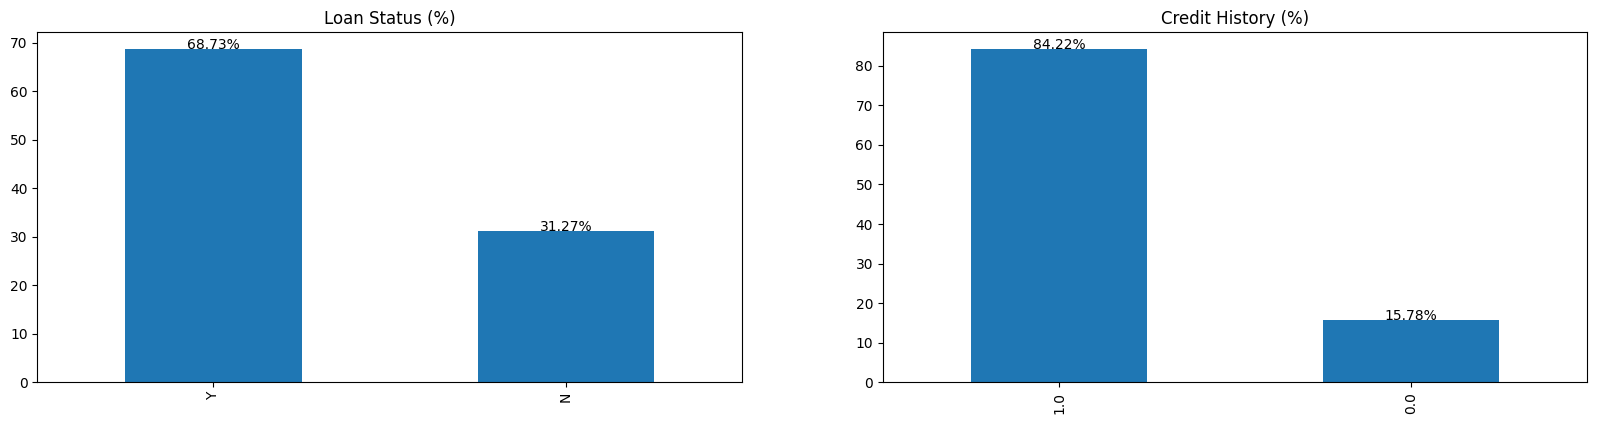

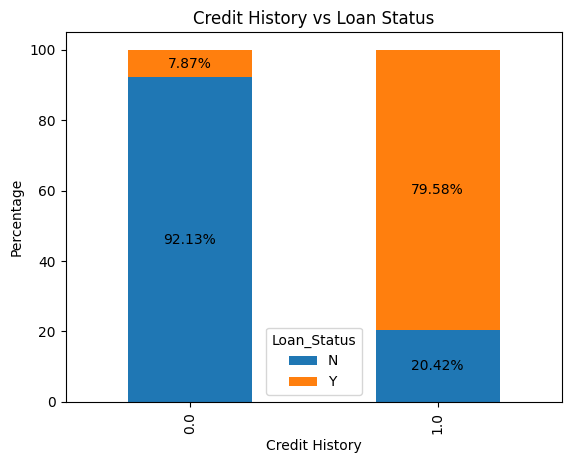

In [175]:
plt.figure(figsize=(20, 10))
#Loan Status
plt.subplot(221)
percentage_values = data['Loan_Status'].value_counts(normalize=True) * 100
percentage_values.plot(kind='bar', title='Loan Status (%)')
for i, value in enumerate(percentage_values):
    plt.text(i, value, f'{value:.2f}%', ha='center')


# Credit History
plt.subplot(222)
credit_history_percentage = data['Credit_History'].value_counts(normalize=True) * 100
credit_history_percentage.plot(kind='bar', title='Credit History (%)')
for i, value in enumerate(credit_history_percentage):
    plt.text(i, value, f'{value:.2f}%', ha='center')

#Credit History vs Loan Status
credit_history_cross = pd.crosstab(data['Credit_History'], data['Loan_Status'])
credit_history_percentages = credit_history_cross.div(credit_history_cross.sum(1).astype(float), axis=0) * 100
ax = credit_history_percentages.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')
plt.title('Credit History vs Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Percentage')





Text(0.5, 1.0, 'Percentage of Total Income for each category')

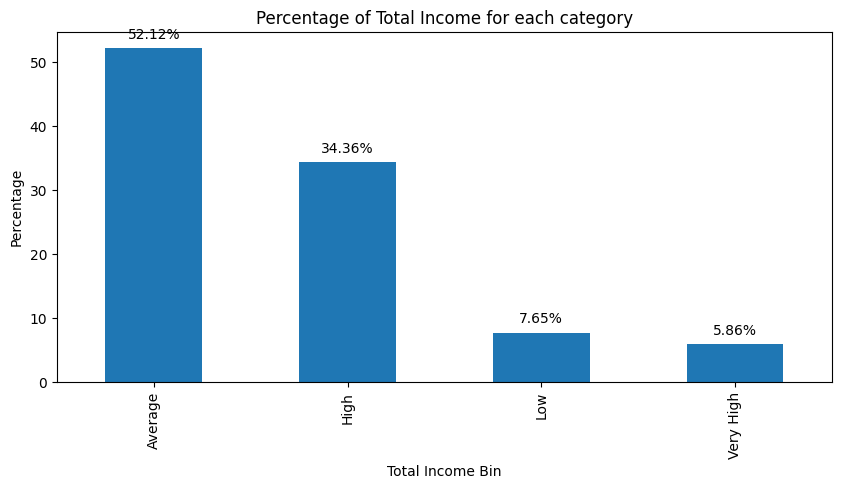

In [176]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
bins = [0, 3000, 6000, 15000, 10000000]
labels = ['Low', 'Average', 'High', 'Very High']

data['Total_Income_bin'] = pd.cut(data['Total_Income'], bins, labels=labels)
percentage_per_bin = (data['Total_Income_bin'].value_counts() / len(data)) * 100

# Plot the percentage of Total Income for each category
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
percentage_per_bin.plot(kind='bar', ax=ax1)

for p1 in ax1.patches:
    ax1.annotate(f'{p1.get_height():.2f}%', (p1.get_x() + p1.get_width() / 2., p1.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1.set_xlabel('Total Income Bin')
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage of Total Income for each category')




Text(0, 0.5, 'Percentage')

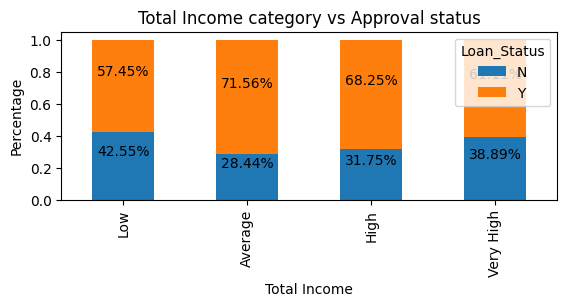

In [177]:
# Plot Total Income category vs Approval status
ax2 = plt.subplot(2, 1, 2)
cross_tab = pd.crosstab(data['Total_Income_bin'], data['Loan_Status'])
cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=ax2)

for p2 in ax2.patches:
    width, height = p2.get_width(), p2.get_height()
    x, y = p2.get_xy()
    ax2.annotate(f'{height * 100:.2f}%', (x + width / 2, y + height / 2),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax2.set_title('Total Income category vs Approval status')
ax2.set_xlabel('Total Income')
ax2.set_ylabel('Percentage')

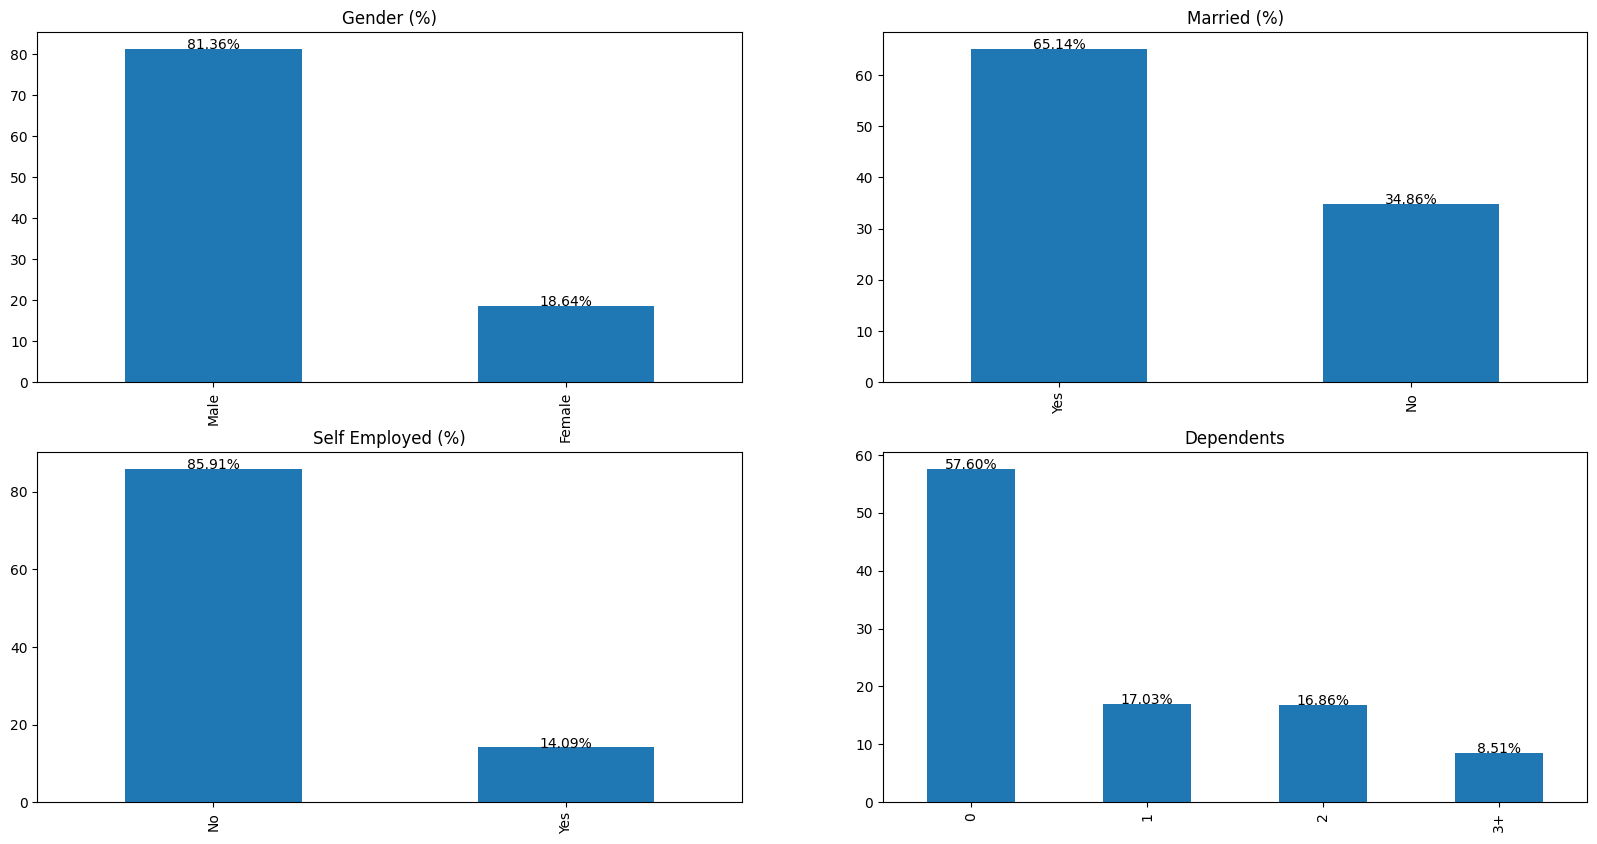

In [178]:
plt.figure(figsize=(20, 10))

#Gender
plt.subplot(221)
gender_percentage = data['Gender'].value_counts(normalize=True) * 100
gender_percentage.plot(kind='bar', title='Gender (%)')
for i, value in enumerate(gender_percentage):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Married
plt.subplot(222)
married_percentage = data['Married'].value_counts(normalize=True) * 100
married_percentage.plot(kind='bar', title='Married (%)')
for i, value in enumerate(married_percentage):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Self Employed
plt.subplot(223)
self_employed_percentage = data['Self_Employed'].value_counts(normalize=True) * 100
self_employed_percentage.plot(kind='bar', title='Self Employed (%)')
for i, value in enumerate(self_employed_percentage):
    plt.text(i, value, f'{value:.2f}%', ha='center')

# Dependents
plt.subplot(224)
dependents = data['Dependents'].value_counts(normalize=True) * 100
dependents.plot(kind='bar', title='Dependents')
for i, value in enumerate(dependents):
    plt.text(i, value, f'{value:.2f}%', ha='center')



# **Data Sanitization**

In [208]:
data = data.drop('Loan_ID',axis=1)
data.drop(columns=['Total_Income_bin'], inplace=True)


In [180]:
data.isnull().sum()
#Number of missing values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Total_Income_bin      0
dtype: int64

In [181]:
columns_with_missing = data.columns[data.isnull().sum() > 0]
for column in columns_with_missing:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

In [209]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1,8312.0
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1,7583.0


In [186]:
data.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
Total_Income_bin     0
dtype: int64

In [191]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1,5849.0,Average
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,High
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0,Low
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0,Average
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0,Low
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0,Average
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1,8312.0,High
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1,7583.0,High


In [205]:
#Handling Categorical variables
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

mapping = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 2, 'Urban': 1},
    'Loan_Status': {'Y': 1, 'N': 0}
}

for column, map_dict in mapping.items():
    try:
        data[column] = data[column].map(map_dict).astype('int')
    except ValueError as e:
        print(f"Warning: converting column '{column}' to integer")

In [221]:
data.head(15)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1,9613.0
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1,3849.0
7,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,2,0,5540.0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1,5532.0
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0,23809.0


# **Modeling**

In [230]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

def apply_scalers(data, cols):
    scalers = {
        'StandardScaler': StandardScaler(),
        'Normalizer': Normalizer(),
        'MinMaxScaler': MinMaxScaler(),
    }

    scaled_data = {}

    for name, scaler in scalers.items():
        # Create a ColumnTransformer to scale specified columns
        preprocessor = ColumnTransformer(
            transformers=[
                (name, scaler, cols)
            ],
            remainder='passthrough'  # Leave other columns untouched
        )

        data_scaled = preprocessor.fit_transform(data.drop('Loan_Status', axis=1))

        # Convert back to DataFrame
        data_scaled_df = pd.DataFrame(data_scaled, columns=[col for col in data.columns if col != 'Loan_Status'])
        # Store the scaled DataFrame
        scaled_data[name] = data_scaled_df

    return scaled_data

In [249]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

def validate_model(models, data, target):
    le = LabelEncoder()
    target_encoded = le.fit_transform(target)

    for name, X in data.items():
        print(f"\nUsing {name}:")
        for model in models:
            X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, target_encoded, test_size=0.20, random_state=42)

            model.fit(X_train, y_train_encoded)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test_encoded, y_pred)
            f1 = f1_score(y_test_encoded, y_pred, average='weighted')
            precision = precision_score(y_test_encoded, y_pred, average='weighted')
            recall = recall_score(y_test_encoded, y_pred, average='weighted')

            # Print the metrics
            print(f"{model.__class__.__name__} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

            # Cross-validation score (for accuracy)
            scores = cross_val_score(model, X, target_encoded, cv=5)
            print(f"{model.__class__.__name__} - Average Cross-Validation Score: {np.mean(scores):.4f}")


In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
scaled_data = apply_scalers(data, cols)


models = [
    RandomForestClassifier(random_state=42),
    LogisticRegression(max_iter=1000, random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
]

validate_model(models, scaled_data, data['Loan_Status'])



Using StandardScaler:
RandomForestClassifier - Accuracy: 0.7805, F1 Score: 0.7578, Precision: 0.7978, Recall: 0.7805
RandomForestClassifier - Average Cross-Validation Score: 0.7883
LogisticRegression - Accuracy: 0.7886, F1 Score: 0.7615, Precision: 0.8253, Recall: 0.7886
LogisticRegression - Average Cross-Validation Score: 0.8062
KNeighborsClassifier - Accuracy: 0.6829, F1 Score: 0.6450, Precision: 0.6644, Recall: 0.6829
KNeighborsClassifier - Average Cross-Validation Score: 0.7329
GaussianNB - Accuracy: 0.7886, F1 Score: 0.7651, Precision: 0.8137, Recall: 0.7886
GaussianNB - Average Cross-Validation Score: 0.7899
DecisionTreeClassifier - Accuracy: 0.6829, F1 Score: 0.6728, Precision: 0.6704, Recall: 0.6829
DecisionTreeClassifier - Average Cross-Validation Score: 0.7216

Using Normalizer:
RandomForestClassifier - Accuracy: 0.7642, F1 Score: 0.7521, Precision: 0.7599, Recall: 0.7642
RandomForestClassifier - Average Cross-Validation Score: 0.7997
LogisticRegression - Accuracy: 0.7886, F

# **Hyperparameter Tuning**

In [294]:
st = MinMaxScaler()
data[cols]=st.fit_transform(data[cols])



In [295]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,0.070489,0.000000,0.172214,0.743590,1.0,1,1,0.055394
1,1,1,1,1,0,0.054830,0.036192,0.172214,0.743590,1.0,0,0,0.058435
2,1,1,0,1,1,0.035250,0.000000,0.082489,0.743590,1.0,1,1,0.019583
3,1,1,0,0,0,0.030093,0.056592,0.160637,0.743590,1.0,1,1,0.043980
4,1,0,0,1,0,0.072356,0.000000,0.191027,0.743590,1.0,1,1,0.057292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,0.034014,0.000000,0.089725,0.743590,1.0,0,1,0.018326
610,1,1,4,1,0,0.048930,0.000000,0.044863,0.358974,1.0,0,1,0.033485
611,1,1,1,1,0,0.097984,0.005760,0.353111,0.743590,1.0,1,1,0.086352
612,1,1,2,1,0,0.091936,0.000000,0.257598,0.743590,1.0,1,1,0.077189


In [298]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

def optimize_models_on_scaled_data(models, param_grids, scaled_data, y, scoring='accuracy', use_grid_search=True, n_iter=10):
    """
    Optimizes given models on scaled versions of X using either GridSearchCV or RandomizedSearchCV.

    Parameters:
    - models: A list of tuples containing model names and their instances.
    - param_grids: A dictionary mapping model classes to their hyperparameter grids.
    - scaled_data: A dictionary containing scaled versions of X, each keyed by the scaler name.
    - y: The target variable.
    - scoring: Metric to optimize.
    - use_grid_search: If True, uses GridSearchCV; otherwise, uses RandomizedSearchCV.
    - n_iter: Number of iterations for RandomizedSearchCV, ignored if use_grid_search is True.

    Returns:
    - A dictionary containing the best models and scores for each scaler and model combination.
    """
    best_models = {}

    for scaler_name, X_scaled in scaled_data.items():
        print(f"\nOptimizing models for data scaled with {scaler_name}:")
        best_models[scaler_name] = {}

        for model_name, model in models:
            if model.__class__ in param_grids:
                param_grid = param_grids[model.__class__]

                if use_grid_search:
                    search = GridSearchCV(model, param_grid, scoring=scoring, cv=5, verbose=1)
                else:
                    search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, scoring=scoring, cv=5, verbose=1, random_state=42)

                search.fit(X_scaled, y)
                best_model = search.best_estimator_
                best_score = search.best_score_

                print(f"Best parameters for {model_name} with {scaler_name}: {search.best_params_}")
                print(f"Best {scoring} score: {best_score:.4f}")

                best_models[scaler_name][model_name] = (best_model, best_score)

    return best_models


models = [
    ('RandomForestClassifier', RandomForestClassifier()),
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

param_grids = {
    RandomForestClassifier: {'n_estimators': np.arange(100,200,10), 'max_depth': [None, 10, 20]},
    LogisticRegression: {'C': [0.01, 0.1, 1, 10]},
    KNeighborsClassifier: {'n_neighbors': np.arange(1,10)},
    DecisionTreeClassifier: {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
}
best_models = optimize_models_on_scaled_data(models, param_grids, scaled_data, y, use_grid_search=True)



Optimizing models for data scaled with StandardScaler:
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for RandomForestClassifier with StandardScaler: {'max_depth': 10, 'n_estimators': 140}
Best accuracy score: 0.8014
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LogisticRegression with StandardScaler: {'C': 0.1}
Best accuracy score: 0.8095
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for KNeighborsClassifier with StandardScaler: {'n_neighbors': 7}
Best accuracy score: 0.7394
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for DecisionTreeClassifier with StandardScaler: {'max_depth': 10, 'min_samples_split': 5}
Best accuracy score: 0.7525

Optimizing models for data scaled with Normalizer:
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for RandomForestClassifier with Normalizer: {'max_depth': 20, 'n_estimators': 100}
Best accuracy sc